# Pakistan Covid-19

        This notebook presents analysis of Covid-19 in Pakistan for the first three months of it's spread.
        Kaggle Dataset: https://www.kaggle.com/datasets/zusmani/pakistan-corona-virus-citywise-data
        Tableau Dashboard: https://public.tableau.com/app/profile/areesha1299/viz/Pakistan-Covid19/Dashboard1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/areeshaasif/Desktop/vscode/PK COVID-19.csv.xls')
data.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [3]:
data.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura
846,4/19/2020,1.0,0.0,0.0,Local - Social Contact,Punjab,Bhakhar
847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
849,Total,8415.0,168.0,2135.0,NaN,NaN,NaN


As noticed last row provides total and preceeding two are null hence they can be dropped.

In [4]:
data = data.dropna(how='any',axis=0)
data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit
...,...,...,...,...,...,...,...
842,4/19/2020,76.0,0.0,0.0,Local - Social Contact,Punjab,Lodhran
843,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Khanewal
844,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Toba Tek Singh
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura


In [5]:
data['Province'].replace('khyber Pakhtunkhwa', 'Khyber Pakhtunkhwa', inplace=True )

## Total Cases

In [6]:
t_cases = data['Cases'].sum()
t_cases

8415.0

## Total Deaths

In [7]:
t_deaths = data['Deaths'].sum()
t_deaths

168.0

## Total Recoveries

In [8]:
t_revoceries = data['Recovered'].sum()
t_revoceries

2135.0

## Death to Cases and Recoveries to Cases Ratio

In [9]:
ratio1 = t_deaths/t_cases
ratio2 = t_revoceries/t_cases
print(f"Death to cases ratio: {round(ratio1, 3)} and Recoveries to cases ratio: {round(ratio2, 3)}")

Death to cases ratio: 0.02 and Recoveries to cases ratio: 0.254


As evident the death rate is 2% and the recovery rate is 25.4% which is significantly higher than the death rate due to corona virus

## City with most cases

In [10]:
most_cases = data['Cases'].groupby(by=data["City"]).sum()
most_cases = most_cases.astype(int)
most_cases

City
Abbottabad        28
Astore            14
Attock            15
Badin              4
Bahawal Nagar     21
                  ..
Toba Tek Singh     7
Torghar            2
Trarkhel           1
Umerkot            1
Vehari            72
Name: Cases, Length: 105, dtype: int64

In [11]:
most_cases.max()

1610

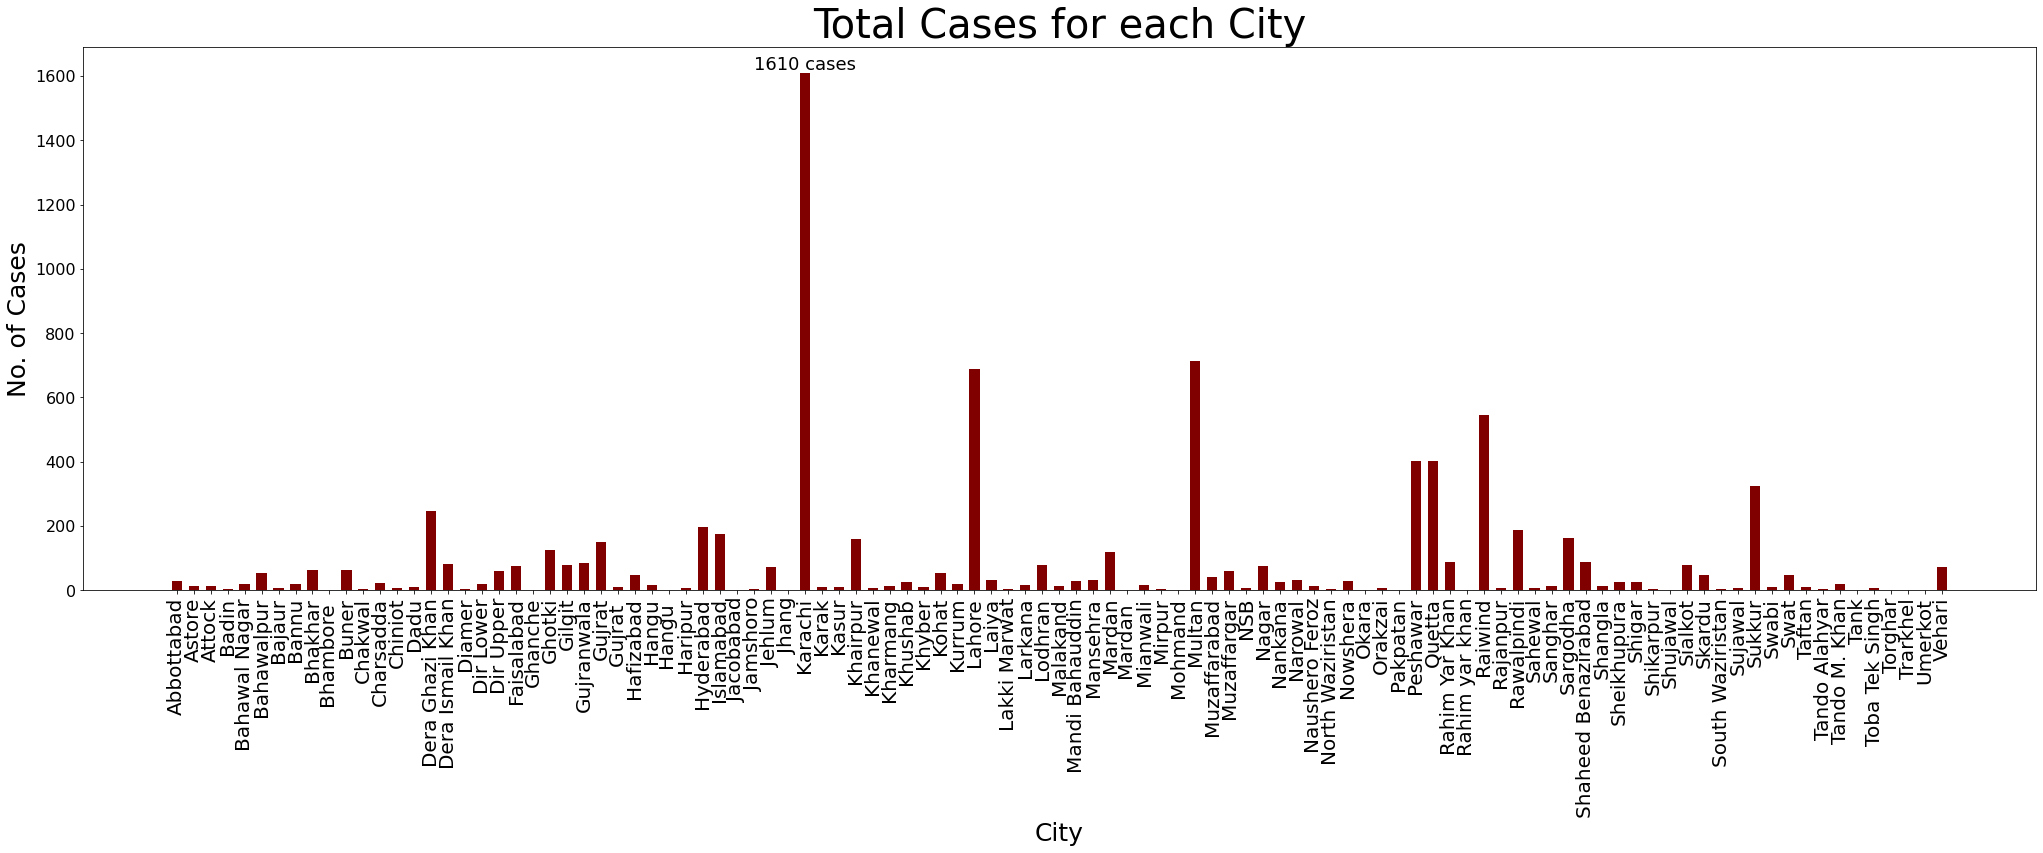

In [12]:
fig = plt.figure(figsize = (35, 10))
plt.bar(most_cases.index.values, most_cases, color ='maroon',width = 0.6)
plt.text(37,1620,"1610 cases",ha='center',fontsize=18)
plt.xlabel("City", fontsize=25)
plt.ylabel("No. of Cases", fontsize=25)
plt.title("Total Cases for each City", fontsize=40)
plt.xticks(fontsize= 20, rotation=90)
plt.yticks(fontsize= 16)
plt.show()

As evident the maximum number of cases are 1610 detected in Karachi, capital of Sindh province.<br>
Second highest in Multan and third highest in Lahore

## Province with Most Cases

In [13]:
most_pcases = data['Cases'].groupby(by=data["Province"]).sum()
most_pcases = most_pcases.astype(int)
most_pcases

Province
Azad Jummu Kashmir                      49
Baluchistan                            415
Federal Administration Tribal Area      46
Gilgit-Baltistan                       263
Islamabad Capital Territory            176
Khyber Pakhtunkhwa                    1078
Punjab                                3777
Sindh                                 2611
Name: Cases, dtype: int64

In [14]:
most_pcases.max()

3777

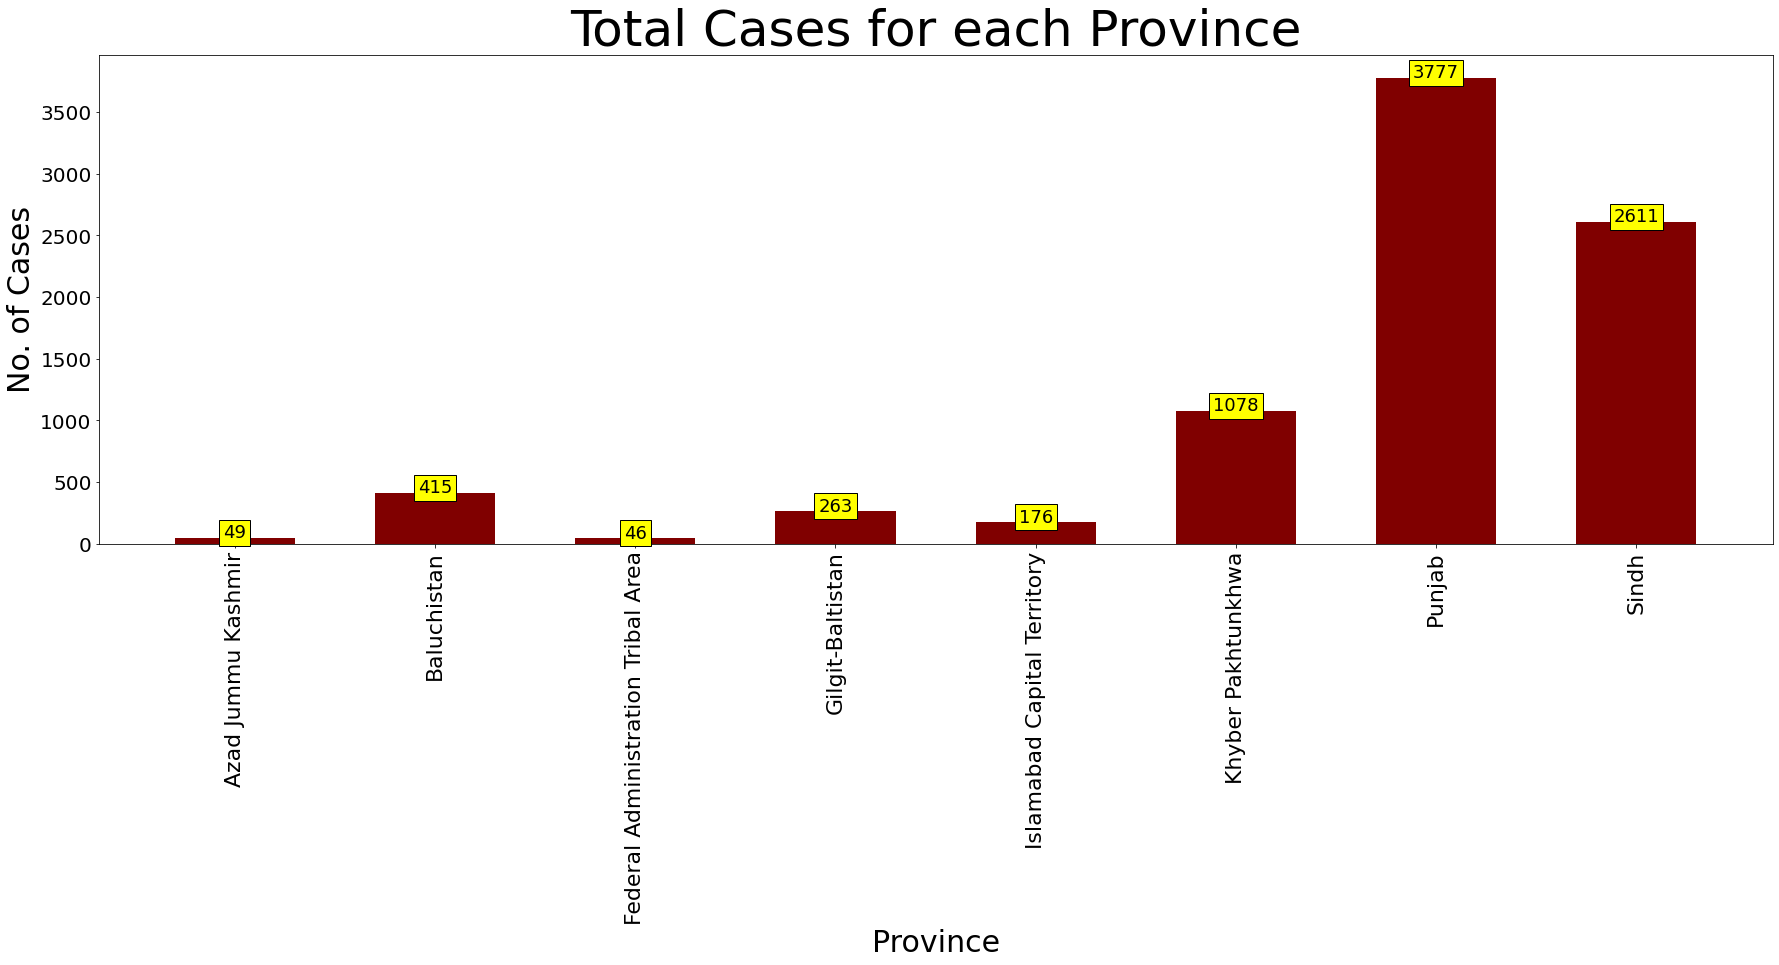

In [15]:
# Function to add value labels

def valuelabel(cases,provinces):
    for i in range(len(cases)):
        plt.text(i,provinces[i],provinces[i], ha = 'center',
                 bbox = dict(facecolor = 'yellow', alpha =1), fontsize=18)
        
fig = plt.figure(figsize = (30, 9))
x = most_pcases.index.values
y = most_pcases
plt.bar(x, y, color ='maroon',width = 0.6)

valuelabel(x,y)
plt.xlabel("Province", fontsize=30)
plt.ylabel("No. of Cases", fontsize=30)
plt.title("Total Cases for each Province", fontsize=50)
plt.xticks(fontsize= 22, rotation=90)
plt.yticks(fontsize= 20)

plt.show()

As seen from the graph, highest number of cases i.e., 3777 were detected in the province of Punjab. Followed by Sindh and Khyber Pakhtunkhwa

## Cases by Travel History

In [16]:
c_history = data['Cases'].groupby(by=data["Travel_history"]).sum()
c_history = c_history.astype(int)

# combining tableeghi jamaat columns
c_history[10] = c_history[10] + c_history[11]
c_history = c_history.drop(index='Tableegi Jamaat')

c_history

Travel_history
China                         2
Dubai                         1
India                         2
International Passenger      30
Iran/Taftan                1051
Jail                        101
KSA                           6
Local - Covid Relative        1
Local - Social Contact     4313
Syria                         7
Tableeghi Jamaat           1037
UK                            5
USA                           1
Unknown                    1858
Name: Cases, dtype: int64

The above results suggest that corona virus was spread mainly due to social contact. However, people who took part in tableeghi jaamat were also affected. The main reason for this can be the unawareness and lack of seriousness of the disease between this group of people. People from Iran should also be restricted from visiting Pakistan.
Despite the results, travel history of 1858 people is unknown which cannot really contribute to making any conclusions

## Cases by Travel Date

In [17]:
c_date = data['Cases'].groupby(by=data["Date"]).sum()
c_date

Date
2/26/2020      3.0
2/29/2020      2.0
3/10/2020      3.0
3/11/2020      1.0
3/12/2020      1.0
3/13/2020      9.0
3/15/2020     34.0
3/16/2020    151.0
3/17/2020     52.0
3/18/2020     57.0
3/19/2020    154.0
3/2/2020       1.0
3/20/2020     50.0
3/21/2020    134.0
3/22/2020    110.0
3/23/2020     82.0
3/24/2020    114.0
3/25/2020    110.0
3/26/2020    131.0
3/27/2020    122.0
3/28/2020    184.0
3/29/2020     87.0
3/30/2020    145.0
3/31/2020    223.0
3/6/2020       0.0
3/7/2020       1.0
3/9/2020       9.0
4/1/2020     260.0
4/10/2020    156.0
4/11/2020    297.0
4/12/2020    253.0
4/13/2020    173.0
4/14/2020    628.0
4/15/2020    321.0
4/16/2020    756.0
4/17/2020    512.0
4/18/2020    265.0
4/19/2020    568.0
4/2/2020     183.0
4/3/2020     239.0
4/4/2020      79.0
4/5/2020     180.0
4/6/2020     249.0
4/7/2020     107.0
4/8/2020     337.0
4/9/2020     882.0
Name: Cases, dtype: float64

In [18]:
mean = c_date.mean()
mean = round(mean,2)
mean

182.93

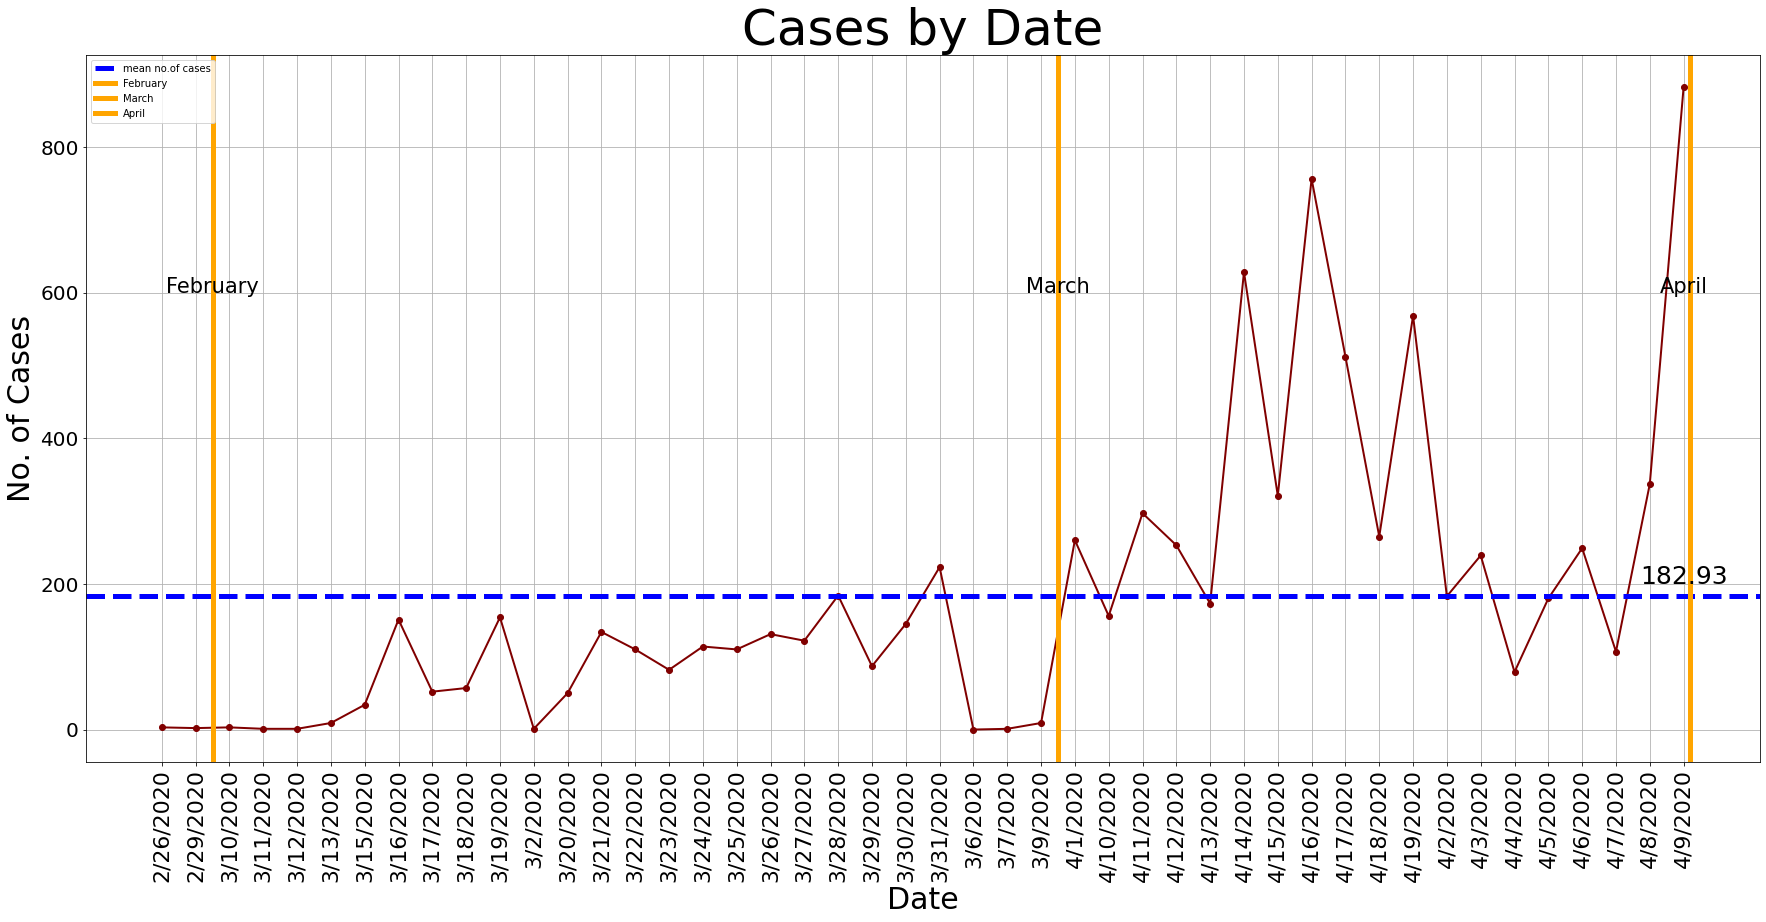

In [19]:
fig = plt.figure(figsize = (30, 13))
x = c_date.index.values
y = c_date
plt.plot(x, y, color ='maroon', marker='o', linewidth=2)

plt.xlabel("Date", fontsize=30)
plt.ylabel("No. of Cases", fontsize=30)
plt.title("Cases by Date", fontsize=50)
plt.xticks(fontsize= 22, rotation=90)
plt.yticks(fontsize= 20)
plt.grid(True)

# Plot horizontal line
plt.axhline(y=mean, linewidth=5, label= 'mean no.of cases', color='blue', linestyle='dashed')
plt.legend(loc = 'upper left', fontsize=18)
plt.text(45,200,mean,ha='center',fontsize=25)

# Plot vertical lines
plt.axvline(x=1.5, linewidth=5, label= 'February', color='orange')
plt.legend(loc = 'upper left')
plt.text(1.5,600,'February',ha='center',fontsize=21)

plt.axvline(x=26.5, linewidth=5, label= 'March', color='orange')
plt.legend(loc = 'upper left')
plt.text(26.5,600,'March',ha='center',fontsize=21)

plt.axvline(x=45.2, linewidth=5, label= 'April', color='orange')
plt.legend(loc = 'upper left')
plt.text(45,600,'April',ha='center',fontsize=21)

plt.show()

## Relavence of travel history and location with cases

In [20]:
group = data.groupby(['Province','Travel_history'])['Cases'].agg('sum')
group

Province                            Travel_history         
Azad Jummu Kashmir                  Iran/Taftan                   1.0
                                    Local - Social Contact       34.0
                                    Unknown                      14.0
Baluchistan                         Iran/Taftan                 118.0
                                    Local - Social Contact      225.0
                                    Unknown                      72.0
Federal Administration Tribal Area  Iran/Taftan                   2.0
                                    Local - Social Contact       43.0
                                    Unknown                       1.0
Gilgit-Baltistan                    Dubai                         1.0
                                    Iran/Taftan                  53.0
                                    Local - Social Contact       67.0
                                    Tableegi Jamaat              17.0
                              

In [21]:
arr = group.index.values
arr

array([('Azad Jummu Kashmir', 'Iran/Taftan'),
       ('Azad Jummu Kashmir', 'Local - Social Contact'),
       ('Azad Jummu Kashmir', 'Unknown'), ('Baluchistan', 'Iran/Taftan'),
       ('Baluchistan', 'Local - Social Contact'),
       ('Baluchistan', 'Unknown'),
       ('Federal Administration Tribal Area', 'Iran/Taftan'),
       ('Federal Administration Tribal Area', 'Local - Social Contact'),
       ('Federal Administration Tribal Area', 'Unknown'),
       ('Gilgit-Baltistan', 'Dubai'), ('Gilgit-Baltistan', 'Iran/Taftan'),
       ('Gilgit-Baltistan', 'Local - Social Contact'),
       ('Gilgit-Baltistan', 'Tableegi Jamaat'),
       ('Gilgit-Baltistan', 'Unknown'),
       ('Islamabad Capital Territory', 'China'),
       ('Islamabad Capital Territory', 'International Passenger'),
       ('Islamabad Capital Territory', 'Local - Social Contact'),
       ('Islamabad Capital Territory', 'USA'),
       ('Islamabad Capital Territory', 'Unknown'),
       ('Khyber Pakhtunkhwa', 'Iran/Taftan'),
 

In [22]:
np.delete(arr,-1)

array([('Azad Jummu Kashmir', 'Iran/Taftan'),
       ('Azad Jummu Kashmir', 'Local - Social Contact'),
       ('Azad Jummu Kashmir', 'Unknown'), ('Baluchistan', 'Iran/Taftan'),
       ('Baluchistan', 'Local - Social Contact'),
       ('Baluchistan', 'Unknown'),
       ('Federal Administration Tribal Area', 'Iran/Taftan'),
       ('Federal Administration Tribal Area', 'Local - Social Contact'),
       ('Federal Administration Tribal Area', 'Unknown'),
       ('Gilgit-Baltistan', 'Dubai'), ('Gilgit-Baltistan', 'Iran/Taftan'),
       ('Gilgit-Baltistan', 'Local - Social Contact'),
       ('Gilgit-Baltistan', 'Tableegi Jamaat'),
       ('Gilgit-Baltistan', 'Unknown'),
       ('Islamabad Capital Territory', 'China'),
       ('Islamabad Capital Territory', 'International Passenger'),
       ('Islamabad Capital Territory', 'Local - Social Contact'),
       ('Islamabad Capital Territory', 'USA'),
       ('Islamabad Capital Territory', 'Unknown'),
       ('Khyber Pakhtunkhwa', 'Iran/Taftan'),
 

The results show that social contact has been the major reason for the spread of Covid-19

## Daily Cases and Daily Recovery Rate (Province Wise)

In [23]:
cr_rate = data.groupby(['Province'])['Cases', 'Recovered'].agg('sum')
cr_rate

,Cases,Recovered
Province,,
Azad Jummu Kashmir,49.0,1.0
Baluchistan,415.0,167.0
Federal Administration Tribal Area,46.0,11.0
Gilgit-Baltistan,263.0,195.0
Islamabad Capital Territory,176.0,15.0
Khyber Pakhtunkhwa,1078.0,196.0
Punjab,3777.0,685.0
Sindh,2611.0,865.0


In [24]:
# Extracting recovered and total cases for each province
isl_d = data.loc[data['Province'] == 'Islamabad Capital Territory']['Date']
isl_r = data.loc[data['Province'] == 'Islamabad Capital Territory']['Recovered']
isl_c = data.loc[data['Province'] == 'Islamabad Capital Territory']['Cases']

sindh_d = data.loc[data['Province'] == 'Sindh']['Date']
sindh_r = data.loc[data['Province'] == 'Sindh']['Recovered']
sindh_c = data.loc[data['Province'] == 'Sindh']['Cases']

punj_d = data.loc[data['Province'] == 'Punjab']['Date']
punj_r = data.loc[data['Province'] == 'Punjab']['Recovered']
punj_c = data.loc[data['Province'] == 'Punjab']['Cases']

fata_d = data.loc[data['Province'] == 'Federal Administration Tribal Area']['Date']
fata_r = data.loc[data['Province'] == 'Federal Administration Tribal Area']['Recovered']
fata_c = data.loc[data['Province'] == 'Federal Administration Tribal Area']['Cases']

kash_d = data.loc[data['Province'] == 'Azad Jummu Kashmir']['Date']
kash_r = data.loc[data['Province'] == 'Azad Jummu Kashmir']['Recovered']
kash_c = data.loc[data['Province'] == 'Azad Jummu Kashmir']['Cases']

gilgit_d = data.loc[data['Province'] == 'Gilgit-Baltistan']['Date']
gilgit_r = data.loc[data['Province'] == 'Gilgit-Baltistan']['Recovered']
gilgit_c = data.loc[data['Province'] == 'Gilgit-Baltistan']['Cases']

kpk_d = data.loc[data['Province'] == 'Khyber Pakhtunkhwa']['Date']
kpk_r = data.loc[data['Province'] == 'Khyber Pakhtunkhwa']['Recovered']
kpk_c = data.loc[data['Province'] == 'Khyber Pakhtunkhwa']['Cases']

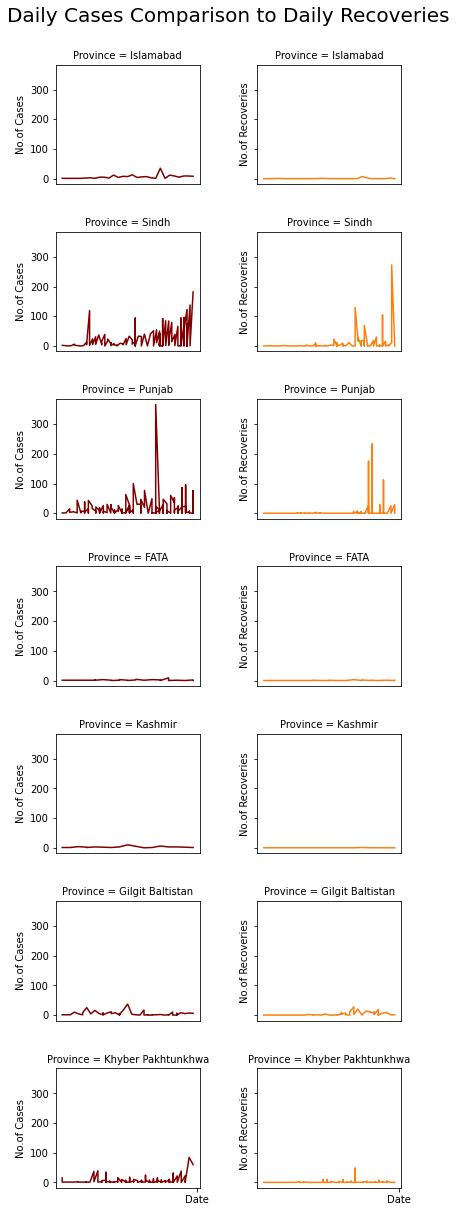

In [25]:
fig, axs = plt.subplots(7, 2, sharey=True) # vertical axis is shared

axs[0, 0].plot(isl_d, isl_c, color='maroon')
axs[0, 0].set_title("Province = Islamabad", fontsize=10)
axs[0, 0].set_ylabel('No.of Cases')
axs[0, 1].plot(isl_d, isl_r,  'tab:orange')
axs[0, 1].set_title("Province = Islamabad", fontsize=10)
axs[0, 1].set_ylabel('No.of Recoveries')
                    
axs[1, 0].plot(sindh_d, sindh_c, color='maroon')
axs[1, 0].set_title("Province = Sindh", fontsize=10)
axs[1, 0].set_ylabel('No.of Cases')
axs[1, 1].plot(sindh_d, sindh_r, 'tab:orange')
axs[1, 1].set_title("Province = Sindh", fontsize=10)
axs[1, 1].set_ylabel('No.of Recoveries')

axs[2, 0].plot(punj_d, punj_c,color='maroon')
axs[2, 0].set_title("Province = Punjab", fontsize=10)
axs[2, 0].set_ylabel('No.of Cases')
axs[2, 1].plot(punj_d, punj_r, 'tab:orange')
axs[2, 1].set_title("Province = Punjab", fontsize=10)
axs[2, 1].set_ylabel('No.of Recoveries')

axs[3, 0].plot(fata_d, fata_c,color='maroon')
axs[3, 0].set_title("Province = FATA", fontsize=10)
axs[3, 0].set_ylabel('No.of Cases')
axs[3, 1].plot(fata_d, fata_r, 'tab:orange')
axs[3, 1].set_title("Province = FATA", fontsize=10)
axs[3, 1].set_ylabel('No.of Recoveries')

axs[4, 0].plot(kash_d, kash_c,color='maroon')
axs[4, 0].set_title("Province = Kashmir", fontsize=10)
axs[4, 0].set_ylabel('No.of Cases')
axs[4, 1].plot(kash_d, kash_r, 'tab:orange')
axs[4, 1].set_title("Province = Kashmir", fontsize=10)
axs[4, 1].set_ylabel('No.of Recoveries')


axs[5, 0].plot(gilgit_d, gilgit_c,color='maroon')
axs[5, 0].set_title("Province = Gilgit Baltistan", fontsize=10)
axs[5, 0].set_ylabel('No.of Cases')
axs[5, 1].plot(gilgit_d, gilgit_r, 'tab:orange')
axs[5, 1].set_title("Province = Gilgit Baltistan", fontsize=10)
axs[5, 1].set_ylabel('No.of Recoveries')

for ax in axs.flat:
    ax.set_xticks([])

axs[6, 0].plot(kpk_d, kpk_c, color='maroon')
axs[6, 0].set_title("Province = Khyber Pakhtunkhwa", fontsize=10)
axs[6, 0].set_ylabel('No.of Cases')
axs[6,0].set_xticks('Date')
axs[6, 1].plot(kpk_d, kpk_r, 'tab:orange')
axs[6, 1].set_title("Province = Khyber Pakhtunkhwa", fontsize=10)
axs[6, 1].set_ylabel('No.of Recoveries')
axs[6,1].set_xticks('Date')
    
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=4, 
                    wspace=0.4, 
                    hspace=0.4)

plt.suptitle('Daily Cases Comparison to Daily Recoveries',fontsize=20, y=4.2)
plt.show()

For Islamabad the trend shows that the detection and recovery rate is inline with eachother.<br>
For Sindh and Punjab the trend shows that initial recovery rate was stagnant, however it caught up with the cases in the after math.<br>
For FATA and Kashmir according to the reported cases the recovery rate was almost the same.<br>
For Gilgit and KPK the recovery rate was slow initially but increased by the end.<br>

## Weekday and Weekend Analysis 
####                In terms of contribution to the number of cases

find out the weekends - group them - analyse trends for cases to see how the contribute to spread of the corona <br>

##### weekend dates
feb - 29 <br>
march - 15, 21, 22, 28, 29, 7, 8 <br>
april - 4, 5, 11, 12, 18, 19 <br>

In [27]:
data.dtypes

Date               object
Cases             float64
Deaths            float64
Recovered         float64
Travel_history     object
Province           object
City               object
dtype: object

In [32]:
data["Detection Date"] = pd.to_datetime(data["Date"])
data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Detection Date
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad,2020-02-26
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-02-26
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad,2020-02-29
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-02-29
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2020-03-02
...,...,...,...,...,...,...,...,...
842,4/19/2020,76.0,0.0,0.0,Local - Social Contact,Punjab,Lodhran,2020-04-19
843,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Khanewal,2020-04-19
844,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Toba Tek Singh,2020-04-19
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura,2020-04-19


In [38]:
data["DayOfWeek"] = data["Detection Date"].dt.weekday

In [42]:
# check if the date is weekend or not
data["IsWeekend"] = data["DayOfWeek"] >= 5
# display the dataframe
data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Detection Date,DayOfWeek,IsWeekend
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad,2020-02-26,2,False
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-02-26,2,False
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad,2020-02-29,5,True
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-02-29,5,True
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2020-03-02,0,False
...,...,...,...,...,...,...,...,...,...,...
842,4/19/2020,76.0,0.0,0.0,Local - Social Contact,Punjab,Lodhran,2020-04-19,6,True
843,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Khanewal,2020-04-19,6,True
844,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Toba Tek Singh,2020-04-19,6,True
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura,2020-04-19,6,True


In [45]:
weekend_data = data.loc[data['IsWeekend'] == True]
weekend_data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Detection Date,DayOfWeek,IsWeekend
2,2/29/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad,2020-02-29,5,True
3,2/29/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-02-29,5,True
6,3/7/2020,1.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-03-07,5,True
18,3/15/2020,13.0,0.0,0.0,Iran/Taftan,Sindh,Sukkur,2020-03-15,6,True
19,3/15/2020,4.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-03-15,6,True
...,...,...,...,...,...,...,...,...,...,...
842,4/19/2020,76.0,0.0,0.0,Local - Social Contact,Punjab,Lodhran,2020-04-19,6,True
843,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Khanewal,2020-04-19,6,True
844,4/19/2020,5.0,0.0,0.0,Local - Social Contact,Punjab,Toba Tek Singh,2020-04-19,6,True
845,4/19/2020,3.0,0.0,0.0,Local - Social Contact,Punjab,Sheikhupura,2020-04-19,6,True


In [46]:
weekday_data = data.loc[data['IsWeekend'] == False]
weekday_data

,Date,Cases,Deaths,Recovered,Travel_history,Province,City,Detection Date,DayOfWeek,IsWeekend
0,2/26/2020,1.0,0.0,0.0,China,Islamabad Capital Territory,Islamabad,2020-02-26,2,False
1,2/26/2020,2.0,0.0,0.0,Iran/Taftan,Sindh,Karachi,2020-02-26,2,False
4,3/2/2020,1.0,0.0,0.0,Iran/Taftan,Gilgit-Baltistan,Gilgit,2020-03-02,0,False
5,3/6/2020,0.0,0.0,1.0,Unknown,Sindh,Karachi,2020-03-06,4,False
7,3/9/2020,6.0,0.0,0.0,Syria,Sindh,Karachi,2020-03-09,0,False
...,...,...,...,...,...,...,...,...,...,...
802,4/17/2020,95.0,0.0,0.0,Tableeghi Jamaat,Punjab,Multan,2020-04-17,4,False
803,4/17/2020,9.0,0.0,0.0,Local - Social Contact,Punjab,Muzaffargar,2020-04-17,4,False
804,4/17/2020,2.0,0.0,0.0,Local - Social Contact,Punjab,Nankana,2020-04-17,4,False
805,4/17/2020,1.0,0.0,0.0,Local - Social Contact,Punjab,Kasur,2020-04-17,4,False


In [59]:
weekend_group = weekend_data.groupby("Date")['Cases'].agg('sum')
weekend_group

Date
2/29/2020      2.0
3/15/2020     34.0
3/21/2020    134.0
3/22/2020    110.0
3/28/2020    184.0
3/29/2020     87.0
3/7/2020       1.0
4/11/2020    297.0
4/12/2020    253.0
4/18/2020    265.0
4/19/2020    568.0
4/4/2020      79.0
4/5/2020     180.0
Name: Cases, dtype: float64

In [65]:
weekend_group.mean() # mean number of cases reported on weekends

168.76923076923077

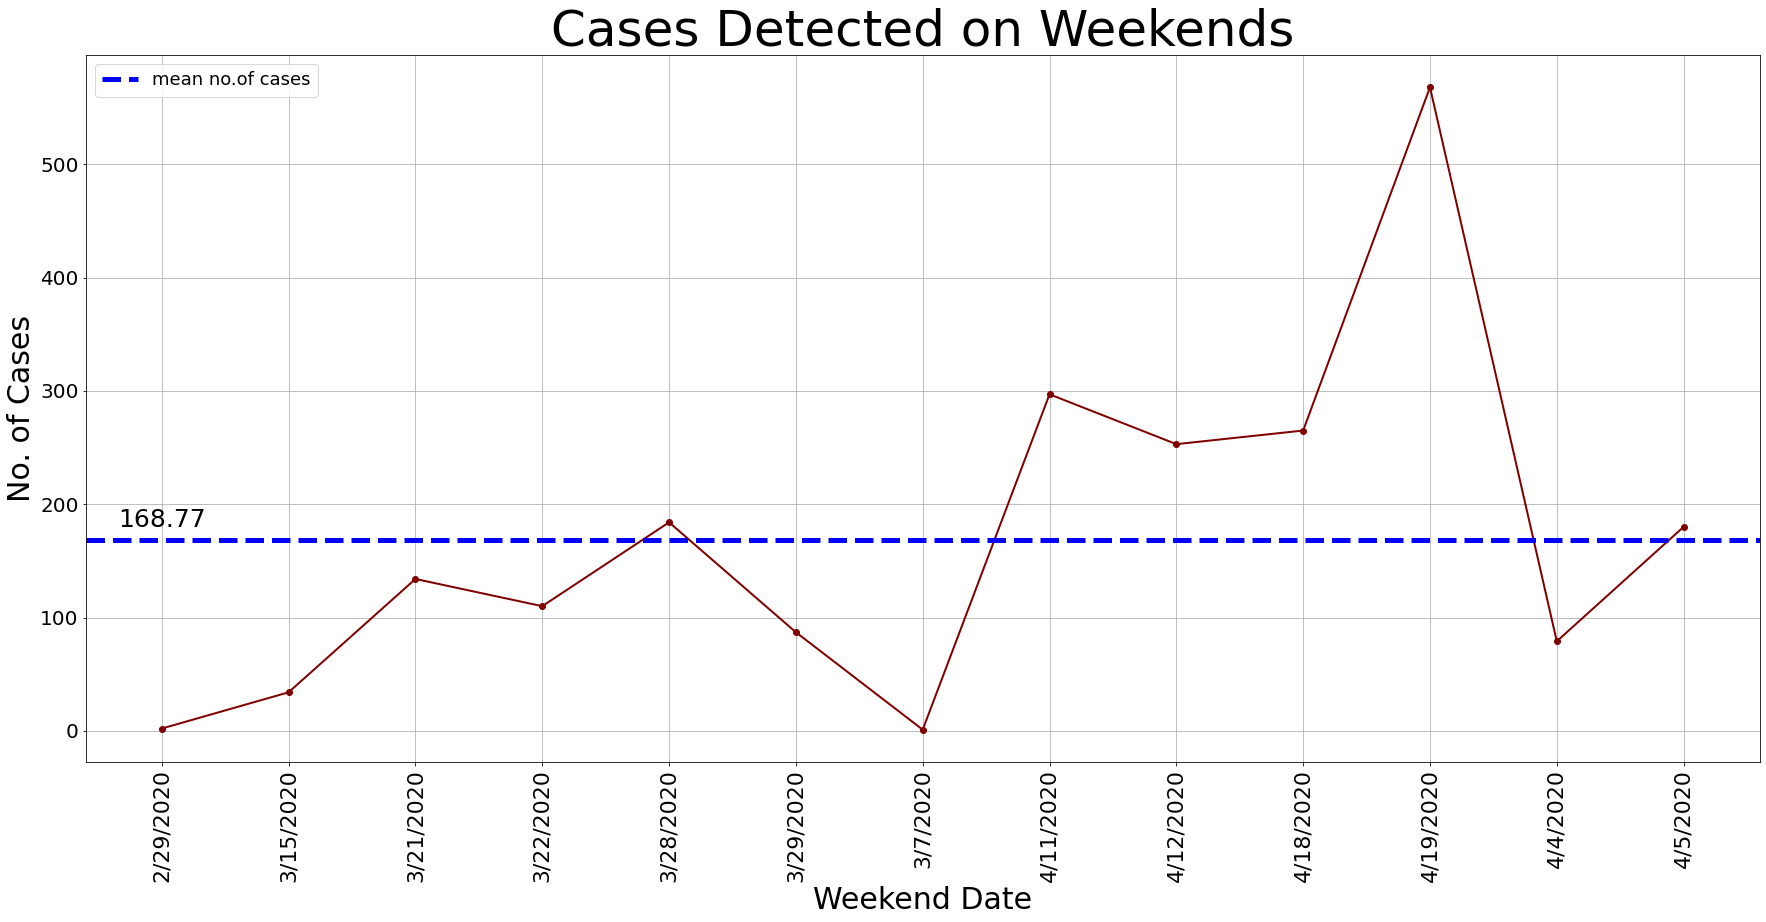

In [76]:
fig = plt.figure(figsize = (30, 13))
x = weekend_group.index.values
y = weekend_group
plt.plot(x, y, color ='maroon', marker='o', linewidth=2)

plt.xlabel("Weekend Date", fontsize=30)
plt.ylabel("No. of Cases", fontsize=30)
plt.title("Cases Detected on Weekends", fontsize=50)
plt.xticks(fontsize= 22, rotation=90)
plt.yticks(fontsize= 20)
plt.grid(True)

# Plot horizontal line
plt.axhline(y=round(weekend_group.mean(),2), linewidth=5, label= 'mean no.of cases', color='blue', linestyle='dashed')
plt.legend(loc = 'upper left', fontsize=18)
plt.text(0,180,round(weekend_group.mean(),2),ha='center',fontsize=25)

plt.show()

In [78]:
weekday_group = weekday_data.groupby("Date")['Cases'].agg('sum')
weekday_group

Date
2/26/2020      3.0
3/10/2020      3.0
3/11/2020      1.0
3/12/2020      1.0
3/13/2020      9.0
3/16/2020    151.0
3/17/2020     52.0
3/18/2020     57.0
3/19/2020    154.0
3/2/2020       1.0
3/20/2020     50.0
3/23/2020     82.0
3/24/2020    114.0
3/25/2020    110.0
3/26/2020    131.0
3/27/2020    122.0
3/30/2020    145.0
3/31/2020    223.0
3/6/2020       0.0
3/9/2020       9.0
4/1/2020     260.0
4/10/2020    156.0
4/13/2020    173.0
4/14/2020    628.0
4/15/2020    321.0
4/16/2020    756.0
4/17/2020    512.0
4/2/2020     183.0
4/3/2020     239.0
4/6/2020     249.0
4/7/2020     107.0
4/8/2020     337.0
4/9/2020     882.0
Name: Cases, dtype: float64

In [81]:
mean = round(weekend_group.mean(), 2) # mean number of cases reported on weekdays
mean

188.52

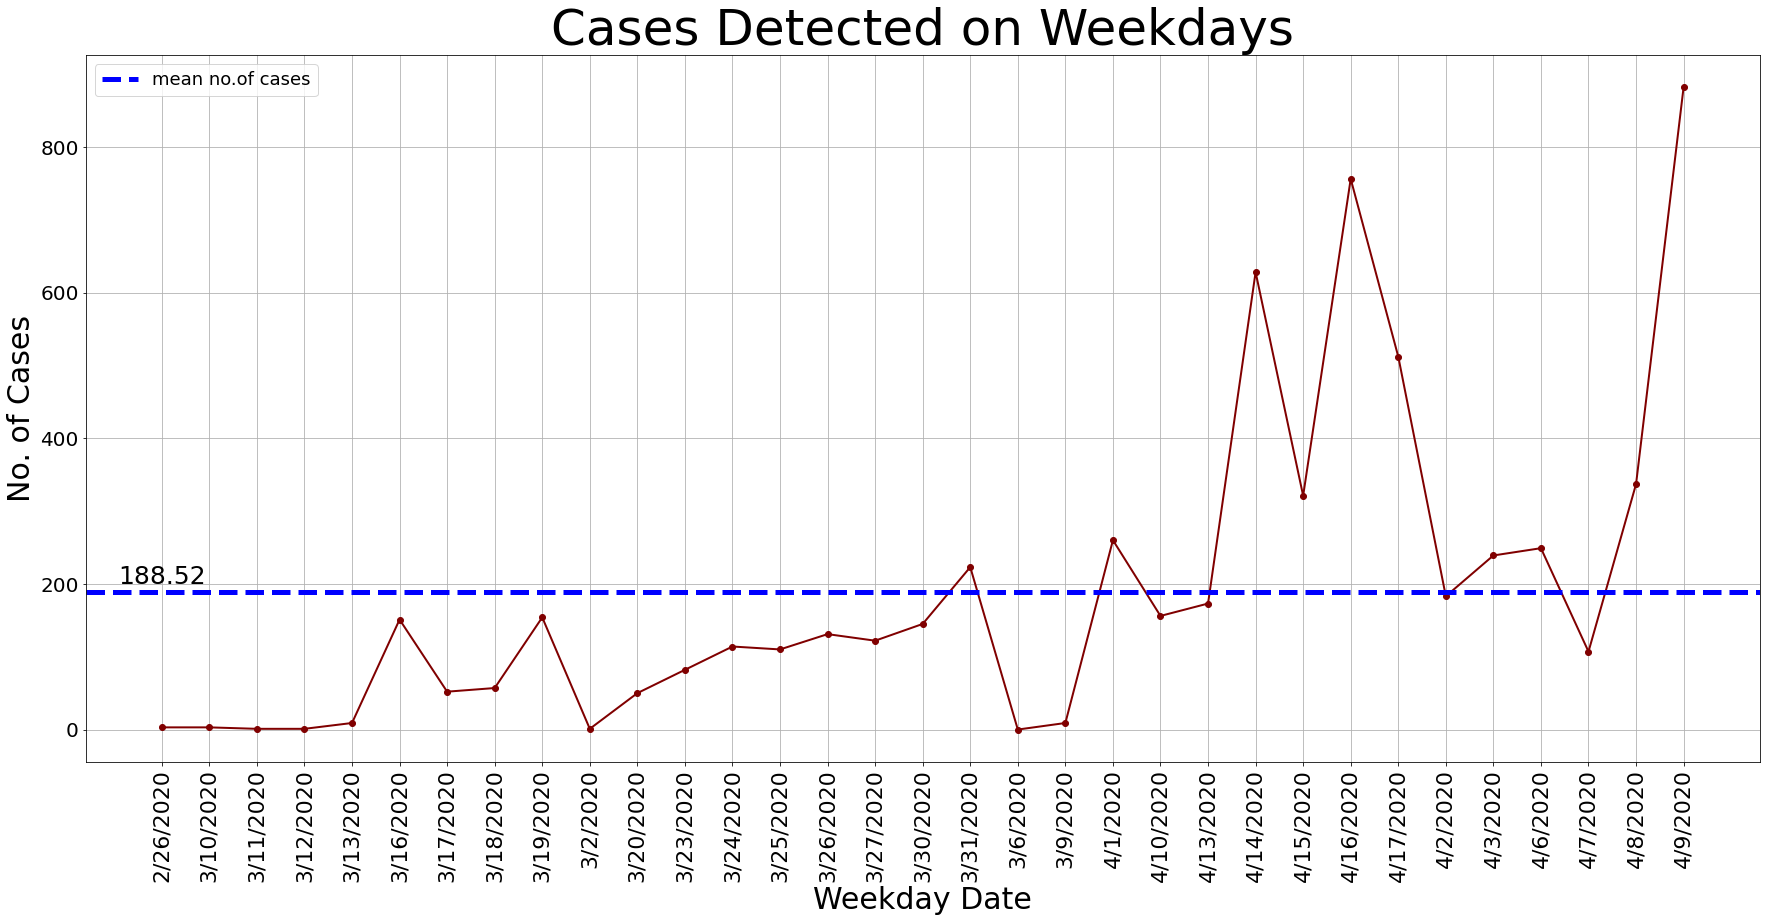

In [84]:
fig = plt.figure(figsize = (30, 13))
x = weekday_group.index.values
y = weekday_group
plt.plot(x, y, color ='maroon', marker='o', linewidth=2)

plt.xlabel("Weekday Date", fontsize=30)
plt.ylabel("No. of Cases", fontsize=30)
plt.title("Cases Detected on Weekdays", fontsize=50)
plt.xticks(fontsize= 22, rotation=90)
plt.yticks(fontsize= 20)
plt.grid(True)

# Plot horizontal line
plt.axhline(y=mean, linewidth=5, label= 'mean no.of cases', color='blue', linestyle='dashed')
plt.legend(loc = 'upper left', fontsize=18)
plt.text(0,200,mean,ha='center',fontsize=25)

plt.show()

The above figures show comparision of cases on weekends and weekdays. <br>
According to the trend, mean number of cases on weekdays are higher than weekends mainly due to social contact as these are the working days. <br>
Comparing the two, it can also be concluded that mid to end of april the cases were increasing at a high rate